In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from pprint import pprint
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from numpy import mean
from numpy import absolute
from numpy import sqrt

QUESTION 1:
['4', '6', '7', '5', '8', '3']
Decisiion Tree Text Representation:
 |--- feature_10 <= 10.53
|   |--- feature_6 <= 98.50
|   |   |--- feature_9 <= 0.57
|   |   |   |--- class: 5
|   |   |--- feature_9 >  0.57
|   |   |   |--- class: 6
|   |--- feature_6 >  98.50
|   |   |--- class: 5
|--- feature_10 >  10.53
|   |--- feature_1 <= 0.42
|   |   |--- feature_9 <= 0.73
|   |   |   |--- class: 6
|   |   |--- feature_9 >  0.73
|   |   |   |--- class: 7
|   |--- feature_1 >  0.42
|   |   |--- feature_9 <= 0.58
|   |   |   |--- class: 6
|   |   |--- feature_9 >  0.58
|   |   |   |--- class: 6



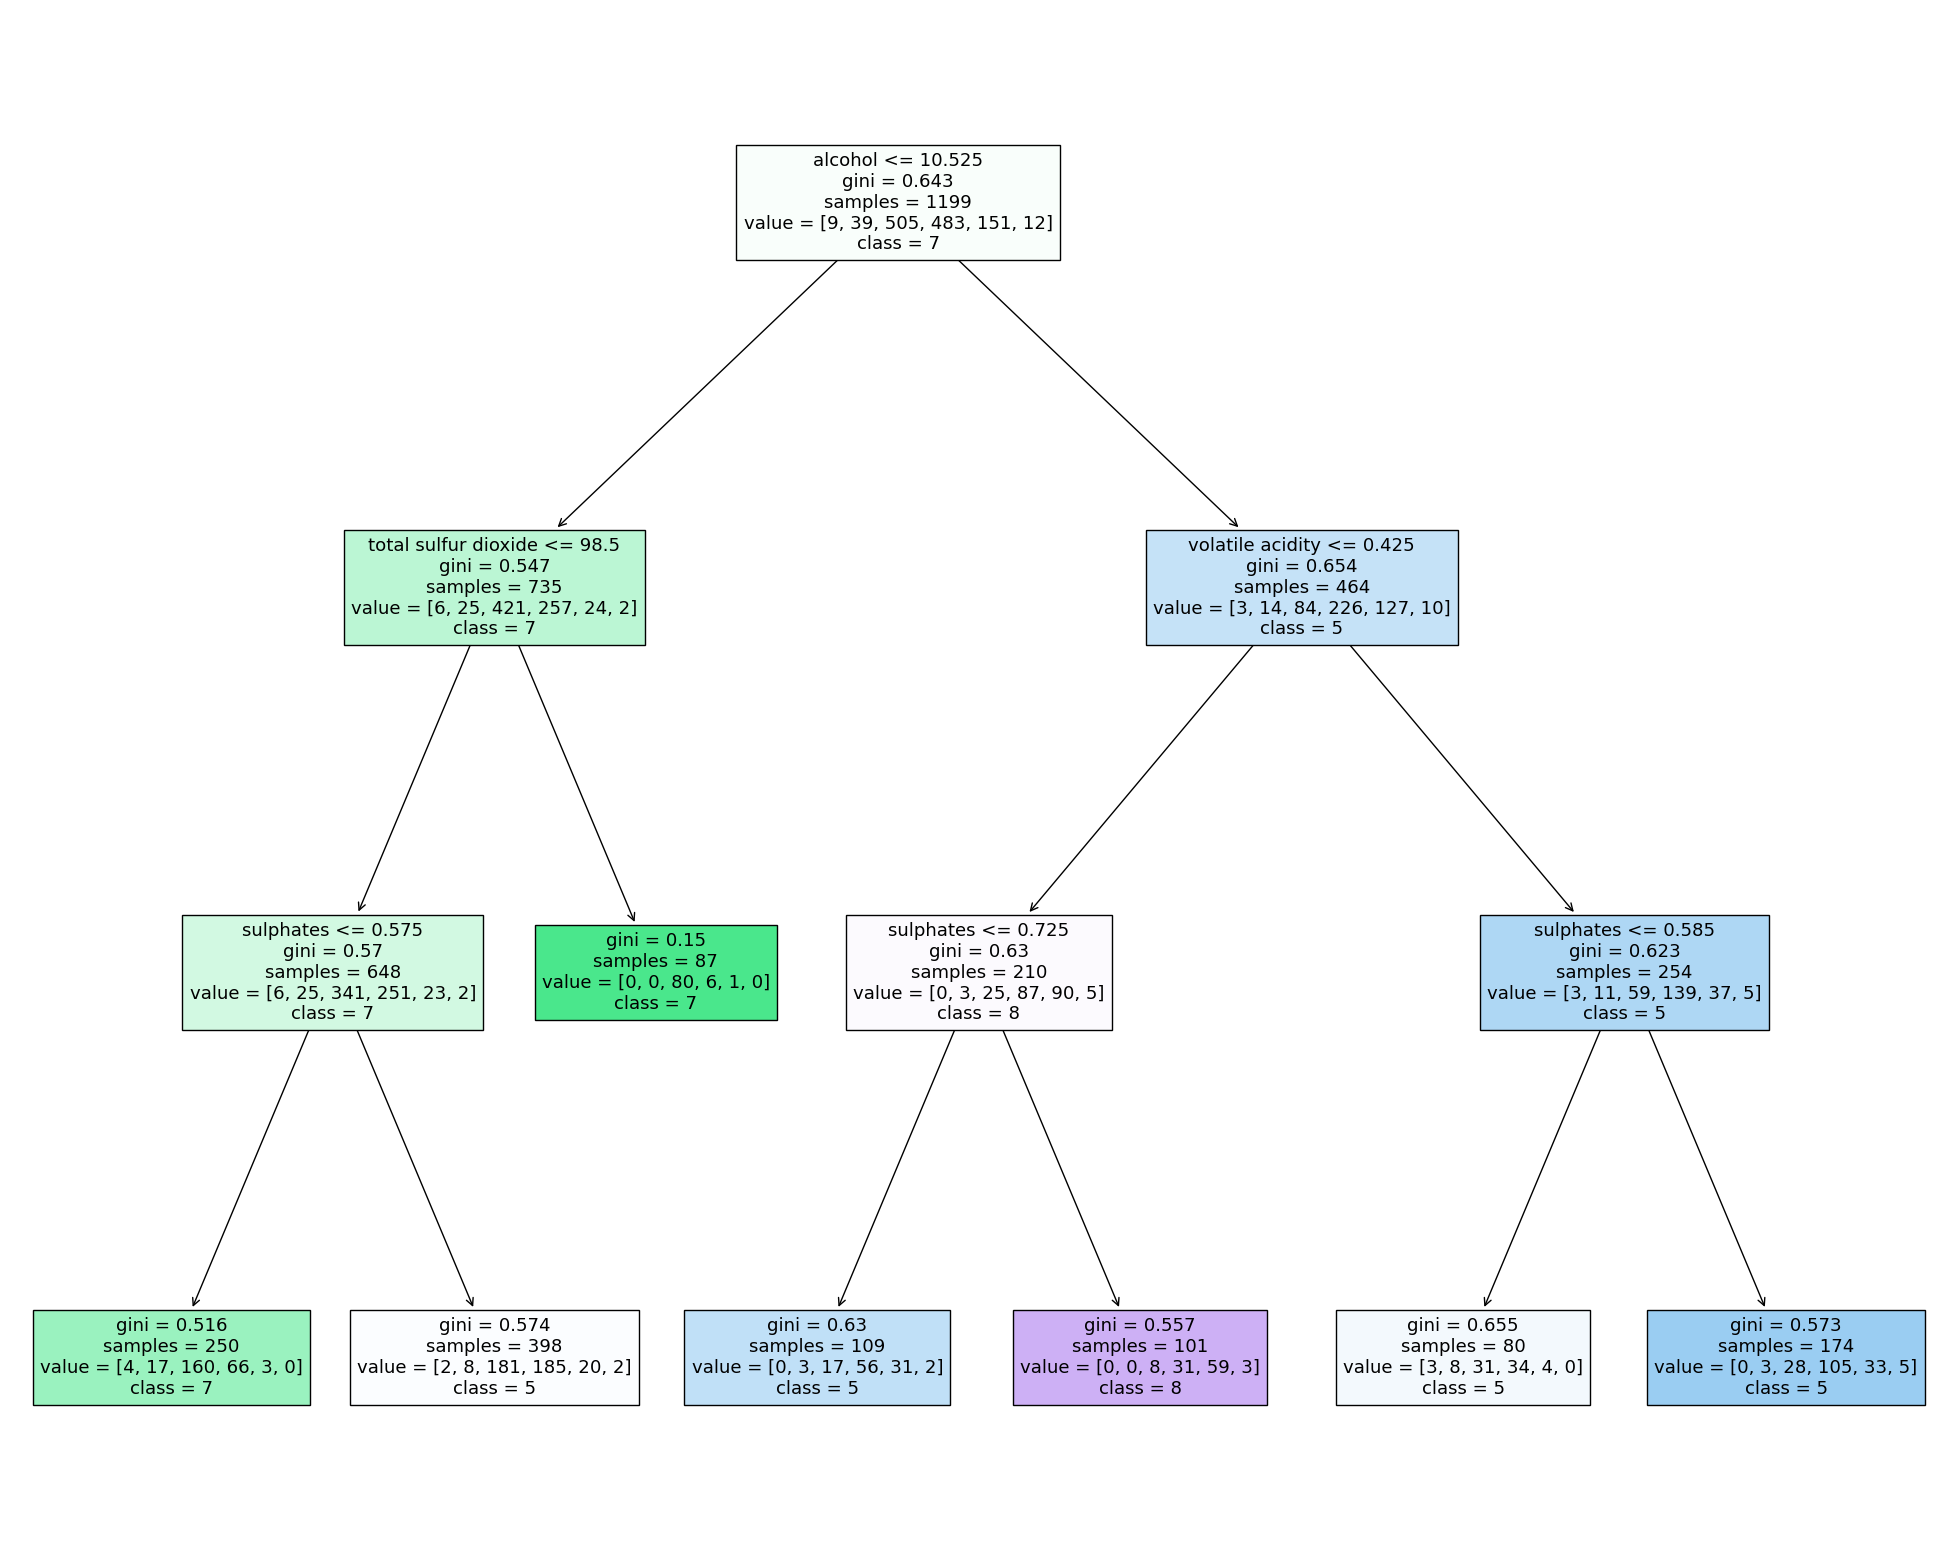

In [3]:
print("QUESTION 1:")
df = pd.read_csv('winequality-red.csv')
X = df.iloc[:,:-1]
Y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

dt = DecisionTreeClassifier(criterion="gini",random_state=100, max_depth=3, min_samples_leaf=50)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

featuresList = list(df.columns[:11])
targetStrList = list(map(str,list(df["quality"].unique())))
print(targetStrList)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=featuresList,
                   class_names=targetStrList,
                   filled=True)
# plt.savefig('ZaidAbujumaiza_DTree')
                   
text_representation = tree.export_text(dt)
print("Decisiion Tree Text Representation:\n",text_representation)
# with open("ZaidAbujumaiza_DTree.log", "w") as fout:
#     fout.write(text_representation)

In [4]:
print("QUESTION 2:")
print("10 cross-validation score:", np.mean(cross_val_score(dt, X, Y, cv=10)))
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1: ", f1_score(y_test, y_pred, average='macro'))

QUESTION 2:
10 cross-validation score: 0.5284119496855346
Accuracy:  0.56
Precision:  0.7729106987171503
Recall:  0.2559363799283154
F1:  0.24962172705706


QUESTION 3:
Linear Regression Coefficient:  0.24665433595563724


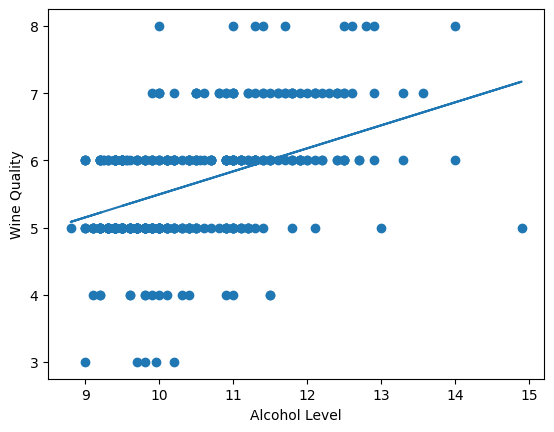

In [5]:
print("QUESTION 3:")
data=df
X=data["alcohol"].values.reshape(-1,1)
Y=data["quality"].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(X,Y)

regression=LinearRegression().fit(x_train,y_train)
y_predict_linear=regression.predict(x_test)
print("Linear Regression Coefficient: ", r2_score(y_test,y_predict_linear))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict_linear)
plt.xlabel("Alcohol Level")
plt.ylabel("Wine Quality")
plt.show()
# plt.savefig('ZaidAbujumaiza_LinearReg.png')

In [6]:
print("QUESTION 4:")
model=LinearRegression()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error',cv=cv, 
n_jobs=-1)
print("Mean Squared Error: ", mean(absolute(scores)))
print("The linear regression model which uses Alcohol to predict wine quality is the best because it has the largest R^2 value and smallest mean squared error value.")

QUESTION 4:
Mean Squared Error:  0.5634260639791546
The linear regression model which uses Alcohol to predict wine quality is the best because it has the largest R^2 value and smallest mean squared error value.
